# Text Mining and its Importance in NLP, ML and AI

## Introduction to Text Data
According to [IBM Article]((https://www.ibm.com/cloud/learn/text-mining)), Text mining, also known as text data mining, is the process of transforming unstructured text into a structured format to identify meaningful patterns and new insights.

Text is a common type of data floating around our world which doesn't holds important meaning by itself but using its occurence and pattern, we can find the meaningful insights that can help us generate decisions to take. There are some types of Text data which can be categorized under below categories:

**Structured Data**
The data that is present as some tabular format can be known as structured data. The common source/format of structured data can be Relational Data. For example, a table that holds the information of a school and the columns can be name of the teacher, name of the student, and so on. These data can be easily manipulated, transformed and hence is most popular.

**Unstructured Data**
The data that doesn't have and doesn't follow a particular format is unstructured data. A common example of the source of unstructured data can be the comments of the viewers on Facebook/Twitter post. 

**Semi-structured Data**
The data that is the hybrid of structured and unstructured data is semi-structured data. The data doesn't follows Relational structure and they can be on any popular formats like JSON, XML, HTML or even a NOSQL databases like MongoDB.



## Importance of Text Data in Artificial Intelligence
Artificial Intelligence is a sub field of Computer Science and it is often defined with other fields like Linguistics, Mathematics and Psychology. Artificial Intelligence is a study of intelligent agents or systems that tends to learn things on its own with the help of set of universal theories, rules from the mathematics and other fields. There are different type of AI like symbolic and non-symbolic.

On the basis of Algorithms, AI can be divided into below fields(not all of them):
* Machine Learning
* Deep Learning etc.

On the basis of Applications, AI can be divided into belwo fields(not all of them):
* Natural Language Processing
* Computer Vision
* Data Analysis etc.

![comparision](https://techgloss.com/wp-content/uploads/2021/05/AI-Machine-Learning-Deep-Learning-Natural-Language-Processing-.jpg)
[source](https://techgloss.com/difference-between-ai-machine-learning-deep-learning-nlp/)

### Machine Learning
It is a sub-field of AI which means that the system or a program learns something from its own. It is different from the rule based engine where we (human) have to give the rules and predict the outcome. There are other field of ML based on the problem or the knowledge/data domain.

#### Supervised Learning
In this type of ML, the data will have a teacher data or label data by looking into which we train our model. For example, Linear Regression, Decision Tree, Support Vector Machine.

#### Unsupervised Learning
In this type of ML, the data will not have a teacher data or label data thus the algorithm should find the set of rules by itself. A common example is clustering.

#### Reinforcement Learning
In this type of ML, the system or agent will try to learn things from the environment on the basis of reward or feedback. A common example is Q-Learning.

### Deep Learning
It is a field of AI and often taken as subfield of the ML but it is different from most of the ML algorithms because Deep Learning is based on the concept of how human neural system works. Neural Networks are the part of Deep Learning and some common examples are, Feed Forward Neural Network, Perceptron, Convolutional Nerual Network.

### Natural Language Processing
It is one of most popular application field of an AI which tends to mimic the learning behavior of natural language. There are tons of examples of NLP and some of them are as below:-
* **Chatbots**: A program that does conversation like a human. Often used on customer service.
* **Text to Voice**: A program that converts written text to human voice. Often used ot read text like stories.
* **Voice to Text**: An example of speech recognition.
* **Sentiment Analysis**: Based on the written comments, classify the commment as harsh or not. 


## Text Mining and NLP
As described above, NLP is a sub-field of AI, where a machine/program learns the natural language. Before doing actual learning, there has to be done most important step to prepare data. The concept of preparing data from different sources and converting them into usable format can be called as Text Mining. The data from various sources can be on various formats and the algorithms that we make won't be able to take those data as input and perform the learning thus the data cleaning, manipulation and transformation are done.


## Text Mining On Twitter Data
For the simplicity, I am going to do text mining of the data from my own [twitter handle](https://twitter.com/durgacodes). We also need to have an API keys from [twitter developer account](https://developer.twitter.com/en/portal/dashboard).

### Installing Packages

* `wordcloud`:Word clouds are killer visualisation tools. They present text data in a simple and clear format
* `snowb`:The package snow (an acronym for Simple Network Of Workstations) provides a high-level interface for using a workstation cluster for parallel computations in R.
* `twitteR`: twitteR is an R package which provides access to the Twitter API.
* `tm`: The tm package allows the use of the meta function to access and modify metadata of documents.
* `base64enc`: This package provides tools for handling base64 encoding



In [ ]:
install.packages("wordcloud")
install.packages("SnowballC")
install.packages("twitteR")
install.packages("tm")
install.packages("base64enc")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### Importing Library and Performing Twitter Authentication

In [ ]:
library("base64enc")
library("openssl")
library("twitteR")
library("tm")
library("stringr")
library("dplyr")
library("wordcloud")
consumer_key <- "my_consumer_key"
consumer_secret <- "my_consumer_secret"
access_token <- "my_access_token"
access_secret <- "my_access_secret"
Sys.setenv(BEARER_TOKEN = "my_beared_token")
setup_twitter_oauth(consumer_key, consumer_secret, access_token, access_secret)

Loading required package: RColorBrewer



### Scraping Tweet from specific handle
I am using my twitter account wiht handle name as `durgacodes`.

In [ ]:
# read at most 3200 tweets
tweets <- userTimeline("durgacodes", n = 3200)
print(paste("Length of tweets is ", length(tweets)))

# create a dataframe of tweets
df <- twListToDF(tweets)
# check top data of dataframe
head(df)

The datframe above have 16 columns and some of those columns can be used as important feature. I will be using the `text` column in this example because it is the text of the tweet.


### Creating a Corpus of the Tweets

#### Definition of Corpus
A Corpus or text corpus is a language resource consisting of a large and structured set of texts.
#### Word Vector
Word vector represents a significant leap forward in advancing our ability to analyze relationships across words, sentences, and documents. [(Source)](https://dzone.com/articles/introduction-to-word-vectors)

In [ ]:
# make a corpus of text
myCorpus <- Corpus(VectorSource(df$text))
inspect(myCorpus[1:6])

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 6

[1] @SimonHoiberg Python                                                                                                                        
[2] Easy tips to become a programmer do code all over the day, debug it all over the night\n#programming                                        
[3] @BinayTimilsina Happy new year                                                                                                              
[4] @PythonWithRune You need too many { and ; in C but not with Python😛                                                                        
[5] Today  is the first blank page of a 365 page book. Write a good one. Happy New Year B.S 2078 from Nepal to all Nepa… https://t.co/PzYWprJWjk
[6] @PythonWithRune Python is my favourite so I learn python                                                                                    


### Data Cleaning
This process includes,
* Changing text/word into Lowercase.
* Removing Punctuation.
* Removing Numbers.
* Removing Stop words.

In [ ]:
# convert to lower case
myCorpus <- tm_map(myCorpus, tolower)

# remove punctuation
myCorpus <- tm_map(myCorpus, removePunctuation)

# remove numbers
myCorpus <- tm_map(myCorpus, removeNumbers)

# remove links, spaces
removeURL <- function(x) gsub("http[^[:space:]]*", "", x)
myCorpus <- tm_map(myCorpus, removeURL)

# remove stopwords
myStopwords <- setdiff(stopwords("english"), c("r", "big"))
myCorpus <- tm_map(myCorpus, removeWords, myStopwords)

myCorpusCopy <- myCorpus
myCorpus <- tm_map(myCorpus, stemDocument)

# reform some pattern
myCorpus <- tm_map(myCorpus, content_transformer(gsub), pattern = "becom", replacement = "become")
myCorpus <- tm_map(myCorpus, content_transformer(gsub), pattern = "programm", replacement = "programmer")
myCorpus <- tm_map(myCorpus, content_transformer(gsub), pattern = "happi", replacement = "happy")
myCorpus <- tm_map(myCorpus, content_transformer(gsub), pattern = "daysofcod", replacement = "#100daysofcode")
myCorpus <- tm_map(myCorpus, content_transformer(gsub), pattern = "communiti", replacement = "community")
myCorpus <- tm_map(myCorpus, content_transformer(gsub), pattern = "bubbl", replacement = "bubble")
myCorpus <- tm_map(myCorpus, content_transformer(gsub), pattern = "structur", replacement = "structure")
myCorpus <- tm_map(myCorpus, content_transformer(gsub), pattern = "exampl", replacement = "example")

inspect(myCorpus[1:6])

### Term Document Matrix
A document-term matrix is a mathematical matrix that describes the frequency of terms that occur in a collection of documents.

In [ ]:

myTdm <- TermDocumentMatrix(myCorpus, control=list(wordLengths=c(1,Inf)))
print(myTdm)
(freq.terms <- findFreqTerms(myTdm, lowfreq=20))
m <- as.matrix(myTdm)
freq <- sort(rowSums(m), decreasing=T)
freq


### Word Cloud
A word cloud is a collection, or cluster, of words presented in different sizes. The bigger and bolder the word appears, the more often it’s mentioned within a given text and the more important it is.

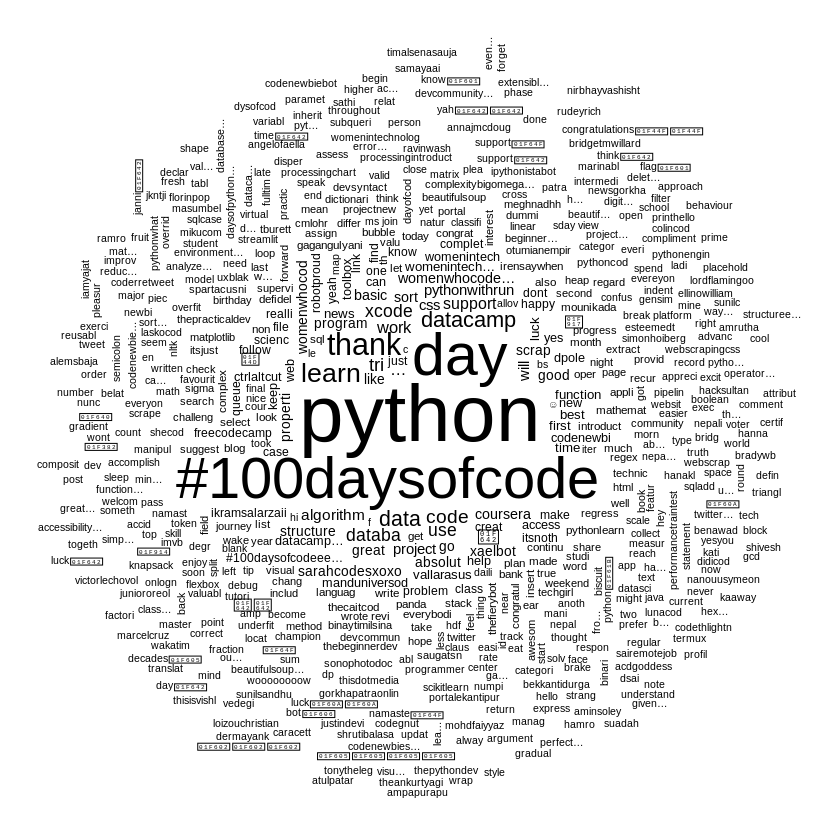

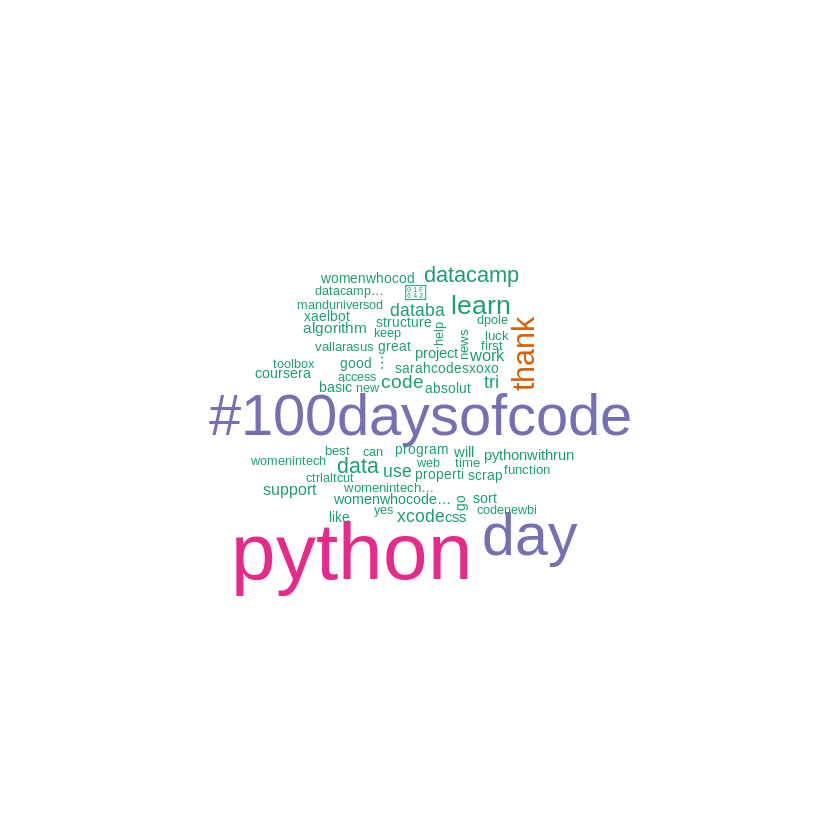

In [ ]:
wordcloud(words=names(freq), freq=freq, min.freq=1, random.order=F)
set.seed(42)
wordcloud(names(freq), freq, min.freq = 5, colors=brewer.pal(4, "Dark2"))


## Conclusion

Looking over the word cloud, the most repeated word will have the highest size and least repeated word have least size of it. Thus, the word *`python`* seems to be repeated most on my tweets. Similarly, the word *`#100daysofcode`* seems to be second, *`day`* as third, *`thank`* as fourths and so on.

### Further Tasks To Do
* Apply **Naive Bayes** on the existing data and predict the new tweet's category. Categories can be python tweet, #100daysofcode, and so on.
* It might be even possible to predict my next tweet. But we might need data more than current.
 
